In [ ]:
#pip install praw nltk spacy rake-nltk


In [ ]:
#pip install bertopic


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039150 sha256=344c9dcf19126fe4aa357d12b28f225ac6896cb3e5ffa0ac89330819f5e936b9
  Stored in dir

In [ ]:
#pip install pandas yake rake-nltk summa keybert


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 801.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.0 MB/s eta 0:00:00
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54388 sha256=6c3dcb9194bc76bebb86fcc0515ac007f93be78e6f6f253be83b5e267dd6579a
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
  Created wheel for keybert: filename=keybert-0.8.3-py3-none-any.whl size=39124 sha256=066ac41c451b7cf4c8527ca411977c7ac574ef6440191f00bb4a8c03acd70318
  Stored in directory: /root/.cache/pip/wheels/70/88/07/1a3bc11fd1dd5f89924a02dcbca89a3015e25e8faa31f904dc
Successfully built summa keybert


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from transformers import pipeline
#tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#wordvec
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
#kemans
from sklearn.cluster import KMeans
#LDA
from sklearn.decomposition import LatentDirichletAllocation

#silhouette_score
from sklearn.metrics import silhouette_score

#keybert
import yake
import keybert
from rake_nltk import Rake
from summa import keywords

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
bc_whole_df = pd.read_csv("/content/breast_cancer_merged.csv")
bc_whole_df.head()

,id,name,title,selftext,num_comments,score_x,score_y,body,controversiality
0,nrcy0,t3_nrcy0,I'm cycling 4000 miles this summer to raise mo...,I'm doing this mostly for my mom who was diagn...,2,3.0,2,I love this idea. You should repost this in a...,0
1,qls70,t3_qls70,How did your hair grow back after chemotherapy?,I am just curious.... what happened to your ha...,3,2.0,2,"Mine was originally thick, wavy and red-brown....",0
2,qls70,t3_qls70,How did your hair grow back after chemotherapy?,I am just curious.... what happened to your ha...,3,2.0,2,"My mom always had coarse, thick, wavy hair. A...",0
3,qnpht,t3_qnpht,33yo Male...,"Hey everyone, I'm a 33yo male, and my left nip...",10,2.0,5,"Honestly, the internet was my worst enemy at t...",0
4,qnpht,t3_qnpht,33yo Male...,"Hey everyone, I'm a 33yo male, and my left nip...",10,2.0,1,"Breast cancer in men is quite common, more tha...",0


In [ ]:
columns_to_include = ['title','selftext']
question_df = bc_whole_df[columns_to_include]
len(question_df)

65552

In [ ]:
columns_to_include = ['body']
comments_df = bc_whole_df[columns_to_include]
len(comments_df)

65552

In [ ]:
columns_to_include = ['title','body']
commentsemotion__df = bc_whole_df[columns_to_include]
len(commentsemotion__df)

65552

In [ ]:
question_df = question_df.drop_duplicates(keep='first')
len(question_df)

8546

In [ ]:
question_df.head()

,title,selftext
0,I'm cycling 4000 miles this summer to raise mo...,I'm doing this mostly for my mom who was diagn...
1,How did your hair grow back after chemotherapy?,I am just curious.... what happened to your ha...
3,33yo Male...,"Hey everyone, I'm a 33yo male, and my left nip..."
6,A bit worried about mammogram...,Hi reddit! \nNot sure this is the right place ...
7,This afternoon I will be going in for my first...,I first noticed the lump in my left breast on ...


In [ ]:
def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Removing user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)

    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return " ".join(lemmatized_tokens)

In [ ]:
#data cleaning

# Applying the cleaning function to our dataframe
question_df['cleaned_title'] = question_df['title'].apply(clean_text)

In [ ]:
commentsemotion__df['cleaned_comments'] = commentsemotion__df['body'].apply(clean_text)

<ipython-input-14-eabac6385b62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commentsemotion__df['cleaned_comments'] = commentsemotion__df['body'].apply(clean_text)


In [ ]:
commentsemotion__df['cleaned_title'] = commentsemotion__df['title'].apply(clean_text)

<ipython-input-15-3d3a7f2f1a4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commentsemotion__df['cleaned_title'] = commentsemotion__df['title'].apply(clean_text)


In [ ]:
question_df['cleaned_question'] = question_df['selftext'].apply(clean_text)

In [ ]:
question_df['cleaned_title'].head()

0    im cycling 4000 mile summer raise money cancer...
1                          hair grow back chemotherapy
3                                            33yo male
6                                bit worried mammogram
7    afternoon going first diagnostic mammogram bre...
Name: cleaned_title, dtype: object

In [ ]:
question_df['cleaned_question'].head(5)

0    im mostly mom diagnosed breast cancer septembe...
1    curious happened hair chemotherapy mine stick ...
3    hey everyone im 33yo male left nipple felt irr...
6    hi reddit sure right place ask figured people ...
7    first noticed lump left breast sunday evening ...
Name: cleaned_question, dtype: object

In [ ]:
words_to_remove = ['hi', 'hey', 'i', 'am','im','thanks','thank you']
def remove_short(text,words_to_remove):
    words = text.split()
    filtered_wrd = [word for word in words if words not in words_to_remove]
    return ' '.join(filtered_wrd)

In [ ]:
question_df['cleaned_question'] = question_df['cleaned_question'].apply(lambda x: remove_short(x, words_to_remove))

#Silhouette Score for TFIDF and Wordvec

In [ ]:
# combined 'cleaned_question' into a single text column
question_df['text'] = question_df['cleaned_question']

#tokenizing  the text (you may need additional preprocessing)
question_df['tokens'] = question_df['text'].apply(word_tokenize)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(tokens) for tokens in question_df['tokens']])

# Word2Vec Model Training
word2vec_model = Word2Vec(sentences=question_df['tokens'], vector_size=100, window=5, min_count=1, sg=0)

# TF-IDF Clustering
num_clusters = 5
kmeans_tfidf = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_tfidf.fit(tfidf_matrix)

# Word2Vec Clustering
def document_vector(tokens):
    vectors = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    if not vectors:
        # Handle cases where all tokens are out-of-vocabulary
        return np.zeros(word2vec_model.vector_size)
    return np.mean(vectors, axis=0)

question_df['word2vec_vector'] = question_df['tokens'].apply(document_vector)

# Pad or truncate Word2Vec vectors to a fixed length
max_length = 100
question_df['word2vec_vector'] = question_df['word2vec_vector'].apply(lambda x: np.pad(x, (0, max_length - len(x)), 'constant'))

# Perform K-Means clustering on Word2Vec vectors
kmeans_word2vec = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_word2vec.fit(list(question_df['word2vec_vector']))

# Evaluate clustering using silhouette score for TF-IDF
silhouette_avg_tfidf = silhouette_score(tfidf_matrix, kmeans_tfidf.labels_)

# Evaluate clustering using silhouette score for Word2Vec
silhouette_avg_word2vec = silhouette_score(list(question_df['word2vec_vector']), kmeans_word2vec.labels_)

print(f"Silhouette Score for TF-IDF: {silhouette_avg_tfidf:}")
print(f"Silhouette Score for Word2Vec: {silhouette_avg_word2vec:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for TF-IDF: 0.003327121712339634
Silhouette Score for Word2Vec: 0.09


In [ ]:
print(f"Silhouette Score for TF-IDF: {silhouette_avg_tfidf:}")
print(f"Silhouette Score for Word2Vec: {silhouette_avg_word2vec:}")

Silhouette Score for TF-IDF: 0.003327121712339634
Silhouette Score for Word2Vec: 0.09400189734443577


#Wordvec


In [ ]:
question_df['tokenized_title'] = question_df['cleaned_title'].apply(nltk.word_tokenize)
wordvec_model_title = Word2Vec(question_df['tokenized_title'],vector_size=100,window=5,min_count=2,workers=4)

In [ ]:
# Function to average word vectors for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
    return feature_vector

# Average the word vectors for each document
doc_word_vector = question_df['tokenized_title'].apply(lambda x: average_word_vectors(x, wordvec_model_title, wordvec_model_title.wv.key_to_index, 100))
doc_word_vector = np.array(list(doc_word_vector))


In [ ]:
#kmeans using wordvec

In [ ]:
sum_of_squared_distances = []
K = range(1, 15)  # Let's say we test for k from 1 to 14

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(doc_word_vector)
    sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

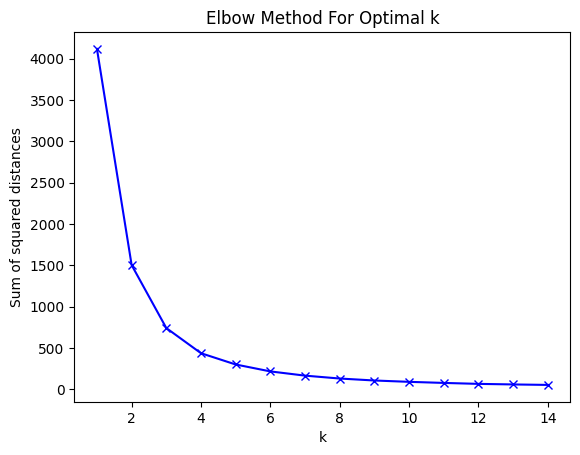

In [ ]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# TSNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(doc_word_vector)

In [ ]:
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(doc_word_vector)
clusters = kmeans.labels_
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


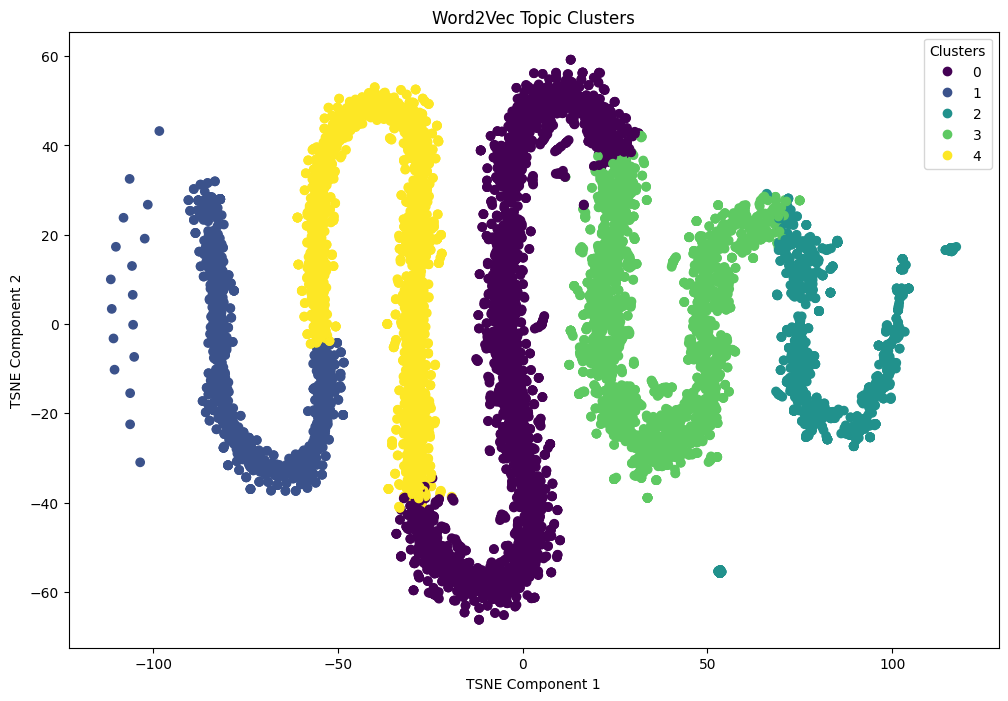

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')

# Adding labels and legend
plt.title('Word2Vec Topic Clusters')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [ ]:
question_df['cluster'] = cluster_labels

In [ ]:
from collections import Counter

# Function to get the most common words in each cluster
def get_top_words(df, cluster_number, n_words):
    cluster_texts = df[df['cluster'] == cluster_number]['cleaned_title']
    all_words = ' '.join(cluster_texts).split()
    most_common_words = Counter(all_words).most_common(n_words)
    return most_common_words

# Number of words to display for each cluster
n_words = 20

# Display top words for each cluster
for i in range(kmeans.n_clusters):
    print(f"Cluster {i} top words: {get_top_words(question_df, i, n_words)}")

Cluster 0 top words: [('chemo', 207), ('cancer', 171), ('breast', 151), ('radiation', 139), ('surgery', 135), ('mastectomy', 127), ('question', 124), ('treatment', 120), ('anyone', 115), ('tamoxifen', 100), ('pain', 98), ('diagnosed', 90), ('help', 85), ('advice', 81), ('mom', 77), ('post', 69), ('need', 67), ('im', 65), ('hair', 64), ('side', 60)]
Cluster 1 top words: [('postmastectomy', 10), ('thursday', 10), ('keytruda', 10), ('anastrozole', 9), ('verzenio', 9), ('depression', 8), ('lymphedema', 8), ('tattoo', 8), ('menopause', 7), ('eye', 7), ('itchy', 7), ('small', 7), ('triumphant', 7), ('injection', 7), ('pcr', 7), ('response', 6), ('carboplatin', 6), ('clinical', 6), ('hello', 6), ('healing', 6)]
Cluster 2 top words: [('cancer', 233), ('breast', 221), ('chemo', 208), ('mastectomy', 104), ('diagnosed', 95), ('treatment', 76), ('radiation', 75), ('mom', 73), ('stage', 67), ('surgery', 60), ('advice', 53), ('pain', 53), ('question', 52), ('need', 51), ('anyone', 51), ('post', 50),

#Keyword Extraction


In [ ]:
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
rake_nltk_var = Rake()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Initialize keyword extraction tools
yake_extractor = yake.KeywordExtractor()
rake_extractor = Rake()
kw_model = keybert.KeyBERT()


# # Function to extract keywords using TextRank
# def extract_keywords_textrank(text):
#     return keywords.keywords(text, scores=False).split('\n')

# Function to extract keywords using KeyBERT
def extract_keywords_keybert(text):
    return [kw[0] for kw in kw_model.extract_keywords(text)]

# Apply keyword extraction to DataFrame
def apply_keyword_extraction(df, column):

    #df['keywords_textrank'] = df[column].apply(extract_keywords_textrank)
    df['keywords_keybert'] = df[column].apply(extract_keywords_keybert)
    return df

# Apply the functions to your DataFrames
key_df = apply_keyword_extraction(question_df, 'cleaned_question')

# Display the DataFrame with extracted keywords (for example, questions)



.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
key_df['keywords_keybert'].head(30)

0         [donate, cancer, donates, chemotherapy, fund]
1                  [hair, blonde, grey, ringlet, color]
3            [lump, mammogram, nipple, swollen, cancer]
6        [mammogram, radiologist, breast, chest, lymph]
7         [lump, biopsy, mammogram, breast, ultrasound]
12         [mammogram, lump, cancer, breast, malignant]
14               [statistic, cancer, phd, breast, rate]
19            [family, cancer, mom, sister, lumpectomy]
21       [cancer, romantic, relationship, love, breast]
22    [breastcancer, cancer, breast, treatment, diag...
25         [cancer, chemo, survivor, breast, uplifting]
29             [lymph, breast, cancer, advice, support]
31                   [wig, cancer, scarf, breast, hair]
36       [cancer, writing, expense, breast, experience]
40    [increaseddecrease, carcinoma, neupogen, herce...
42               [lump, mammogram, breast, cyst, chest]
45          [ovary, ovarian, removing, removed, remove]
47                  [cancer, lump, tumor, wife, 

In [ ]:
keywords_df.head(10)

,keyword,count
32,chemo,1577
56,mastectomy,1236
31,diagnosed,1111
30,treatment,1041
105,surgery,1021
25,lumpectomy,962
109,oncologist,779
16,biopsy,756
53,tumor,685
9,lump,541


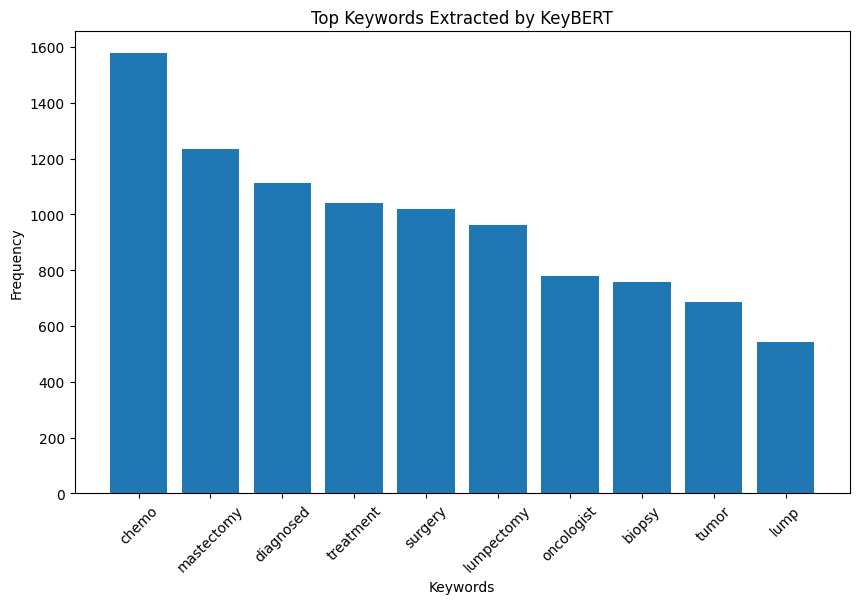

In [ ]:
# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(keywords_df['keyword'][:10], keywords_df['count'][:10])  # Top 10 keywords
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top Keywords Extracted by KeyBERT')
plt.xticks(rotation=45)
plt.show()



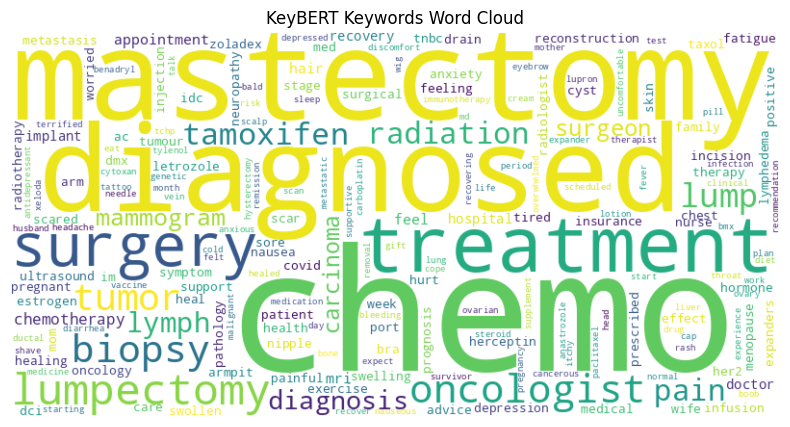

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('KeyBERT Keywords Word Cloud')
plt.show()

#LDA

In [ ]:
# Combine keywords into a single string per row
key_df['combined_keywords'] = key_df['keywords_keybert'].apply(lambda x: ' '.join(x))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Apply TF-IDF to the combined keywords
tfidf_matrix_key = tfidf_vectorizer.fit_transform(key_df['combined_keywords'])



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Number of topics
n_topics = 5

# Initialize LDA
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)

# Fit LDA model
lda.fit(tfidf_matrix_key)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

display_topics(lda, tfidf_vectorizer.get_feature_names_out(), 10)


Topic 0:
breast mastectomy surgery nipple bra dci scared radiation pain cancer
Topic 1:
chemo treatment cancer infusion taxol therapy anxiety pain nausea herceptin
Topic 2:
insurance hurt dmx chemo tamoxifen treatment prescribed letrozole exercise metastatic
Topic 3:
doctor hair chemo feel feeling effect treatment tired cancer im
Topic 4:
cancer diagnosed lumpectomy biopsy mastectomy tumor oncologist surgery breast chemo


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score

# Assuming tfidf_matrix_key is your TF-IDF matrix and tfidf_vectorizer is your fitted TfidfVectorizer

# Fit LDA model
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
lda.fit(tfidf_matrix_key)

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display topics
display_topics(lda, tfidf_vectorizer.get_feature_names_out(), 10)

# Transform the TF-IDF matrix to topic distribution
topic_distributions = lda.transform(tfidf_matrix_key)

# Compute Silhouette Score
# Note: Silhouette score requires dense matrix and distance metric like Euclidean
# LDA's topic distribution is not directly compatible with silhouette score
# because it's not about clustering in the traditional sense.
# For illustrative purposes, this is how you would calculate it:
# silhouette_avg = silhouette_score(tfidf_matrix_key.toarray(), topic_distributions.argmax(axis=1), metric='euclidean')
# print("Silhouette Score:", silhouette_avg)

# Log Likelihood and Perplexity
print("Log Likelihood:", lda.score(tfidf_matrix_key))
print("Perplexity:", lda.perplexity(tfidf_matrix_key))

# Compare LDA Model with different number of topics
# This loop will train multiple LDA models with different number of topics
# and print their log likelihood and perplexity for comparison
for n in range(1, 5):
    lda_model = LatentDirichletAllocation(n_components=n, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
    lda_model.fit(tfidf_matrix_key)
    print(f"{n} Topics - Log Likelihood:", lda_model.score(tfidf_matrix_key))
    print(f"{n} Topics - Perplexity:", lda_model.perplexity(tfidf_matrix_key))


Topic 0:
breast mastectomy surgery nipple bra dci scared radiation pain cancer
Topic 1:
chemo treatment cancer infusion taxol therapy anxiety pain nausea herceptin
Topic 2:
insurance hurt dmx chemo tamoxifen treatment prescribed letrozole exercise metastatic
Topic 3:
doctor hair chemo feel feeling effect treatment tired cancer im
Topic 4:
cancer diagnosed lumpectomy biopsy mastectomy tumor oncologist surgery breast chemo
Log Likelihood: -126503.38461513004
Perplexity: 1430.9049924556778
1 Topics - Log Likelihood: -114383.495691571
1 Topics - Perplexity: 713.3155887012034
2 Topics - Log Likelihood: -117538.59621291686
2 Topics - Perplexity: 855.037761898644
3 Topics - Log Likelihood: -121140.49633236378
3 Topics - Perplexity: 1051.5604280966713
4 Topics - Log Likelihood: -124209.72635613257
4 Topics - Perplexity: 1254.2837221985833


#BERTopic


In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# Assuming you have a DataFrame 'key_df' with a column 'combined_keywords'
documents = key_df['combined_keywords'].tolist()

# Initialize BERTopic
topic_model = BERTopic(language="english")

# Fit the model
topics, probabilities = topic_model.fit_transform(documents)


In [ ]:
topic_model.visualize_barchart(top_n_topics=5)


#emotion Analysis

We have Performed emotional analysis in a different notebook. Kindly run the code for the outputs as it is taking longer than ususal as we reached the limit usage of T4 GPU in colab.Please excuse us for this.

#Kmeans


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns 'title' and 'comments' containing your cleaned data

# Combine 'title' and 'comments' columns into a single text column
df['text'] = df['title'] + ' ' + df['comments']

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the data with TF-IDF vectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Perform K-Means clustering
num_clusters = 5  # Adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Add cluster labels to your DataFrame
df['cluster'] = kmeans.labels_

# Dimensionality reduction for visualization (optional)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]

# Visualize the clusters (optional)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='viridis', legend='full')
plt.title('K-Means Clustering of Reddit Posts on Breast Cancer')
plt.show()

# You can also print the clusters and inspect them further
for cluster_id in range(num_clusters):
    cluster_df = df[df['cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(f"Number of Posts: {len(cluster_df)}")
    print("\n")


In [ ]:
commentsemotion__df

In [ ]:
#!pip install sentence_transformers
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import pandas as pd


# Load pre-trained DistilBERT model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Embed comments into vectors
comment_embeddings = model.encode(commentsemotion__df['cleaned_comments'], show_progress_bar=True)

# Apply K-Means clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(comment_embeddings)

# Add cluster labels to the DataFrame
commentsemotion__df['Cluster'] = kmeans.labels_

In [ ]:
commentsemotion__df[['body', 'Cluster']]

In [ ]:
grouped = commentsemotion__df.groupby('Cluster')

In [ ]:
for group_name, group_data in grouped:
    print(f"cluster value : {group_name}")
    print(f"value 1: {group_data['cleaned_comments'].iloc[0]}")
    print(f"value 2: {group_data['cleaned_comments'].iloc[1]}")
    print(f"value 2: {group_data['cleaned_comments'].iloc[2]}")

In [ ]:
#!pip install sentence_transformers
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import pandas as pd


# Load pre-trained DistilBERT model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Embed comments into vectors
comment_embeddings = model.encode(commentsemotion__df['body'], show_progress_bar=True)

# Apply K-Means clustering
num_clusters = 4  # Assuming you want 4 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(comment_embeddings)

# Add cluster labels to the DataFrame
commentsemotion__df['Cluster'] = kmeans.labels_

In [ ]:
commentsemotion__df[['body', 'Cluster']]

In [ ]:
grouped = commentsemotion__df.groupby('Cluster')

In [ ]:
for group_name, group_data in grouped:
    print(f"cluster value : {group_name}")
    print(f"value 1: {group_data['cleaned_comments'].iloc[0]}")
    print(f"value 2: {group_data['cleaned_comments'].iloc[1]}")
    print(f"value 2: {group_data['cleaned_comments'].iloc[2]}")

#Naive Bayes and SVM


In [ ]:
data_emotions = pd.read_csv('/content/tweet_emotions.csv')
data_emotions.head()

In [ ]:
sns.countplot(x='sentiment', data=data_emotions)
plt.xticks(rotation=45)

In [ ]:
data_emotions = data_emotions[data_emotions['sentiment'] != 'enthusiasm']
data_emotions = data_emotions[data_emotions['sentiment'] != 'surprise']
data_emotions = data_emotions[data_emotions['sentiment'] != 'boredom']
data_emotions = data_emotions[data_emotions['sentiment'] != 'fun']


data_emotions['sentiment'] = data_emotions['sentiment'].apply(lambda x: 'Sad' if x in ['sadness', 'worry'] else x)
data_emotions['sentiment'] = data_emotions['sentiment'].apply(lambda x: 'Happy' if x in ['love','happiness'] else x)
data_emotions['sentiment'] = data_emotions['sentiment'].apply(lambda x: 'Anger' if x in ['anger', 'hate'] else x)
data_emotions['sentiment'] = data_emotions['sentiment'].apply(lambda x: 'Neutral' if x in ['empty', 'neutral','relief'] else x)


In [ ]:
sns.countplot(x='sentiment', data=data_emotions)
plt.xticks(rotation=45)

In [ ]:
data_emotions.columns

In [ ]:
data_bc = data_bc[['body']]
data_emotions = data_emotions[['content','sentiment']]

In [ ]:
# Apply text preprocessing to 'Column3'
data_bc['cleaned_body'] = data_bc['body'].apply(preprocess_data)
data_emotions['cleaned_content'] = data_emotions['content'].apply(preprocess_data)

In [ ]:
print(data_bc['cleaned_body'])

In [ ]:
# Split the training data into features (X) and labels (Y)
X_train = data_emotions['cleaned_content']
y_train = data_emotions['sentiment']

# Split the testing data into features (X_test)
X_test = data_bc['cleaned_body']

# Use TF-IDF Vectorizer to convert text data to numerical vectors
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict the categories for the testing data using Naive Bayes
nb_predictions = nb_classifier.predict(X_test_tfidf)

# Add Naive Bayes predictions to the testing dataframe
data_bc['Predicted_Category_NB'] = nb_predictions

# Train a Linear Support Vector Machine (SVM) classifier
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_tfidf, y_train)

# Predict the categories for the testing data using SVM
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Add SVM predictions to the testing dataframe
data_bc['Predicted_Category_SVM'] = svm_predictions


In [ ]:
data_bc

In [ ]:
# Assuming you have the following columns in df2:
# 'Predicted_Category_NB', 'Predicted_Category_SVM', 'Predicted_Category_BERT'

# Create count plots
plt.figure(figsize=(12, 6))

# Count plot for Naive Bayes predictions
plt.subplot(1, 2, 1)
sns.countplot(x='Predicted_Category_NB', data=data_bc)
plt.title('Naive Bayes Predictions')

# Count plot for SVM predictions
plt.subplot(1, 2, 2)
sns.countplot(x='Predicted_Category_SVM', data=data_bc)
plt.title('SVM Predictions')

plt.tight_layout()
plt.show()

#emotion analysis error analysis


#URL


In [ ]:

def check_legitimacy(url):
    return 'legitimate' if re.search(r'\.gov|\.org|\.edu', url) else 'not legitimate'

comments_df['Legitimacy'] = comments_df['body'].apply(check_legitimacy)

In [ ]:
comments_df['Legitimacy'].value_counts()

In [ ]:
comments_df[comments_df['Legitimacy']=='legitimate']

In [ ]:
url_pattern = r'https?://\S+'

In [ ]:
comments_df['URLs'] = comments_df['body'].str.contains('.gov', na=False)

In [ ]:
comments_df['URLs'].value_counts()


#URL

In [ ]:
legitimate_values = df.loc[df['Legitimacy'] == 'legitimate', 'body'].tolist()

In [ ]:
print(legitimate_values[0])

In [ ]:
pattern = r'(http?://\S+|www\.\S+)'
df['C'] = df['body'].str.extract(pattern, expand=False).fillna('none found')

In [ ]:
df['C'] = df['body'].str.extract(pattern, expand=False).fillna('none found')

In [ ]:
df['C'].value_counts()

In [ ]:
filtered_values = df.loc[df['C'] != 'none found']
filtered_values['C']